In [123]:
# notebook to load an image pair from coregistration and compute coherence

import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
%matplotlib inline


# img1 = rasterio.open("/data/users/Public/jonathanbahlmann/spark_results/2021/06/21/7E17_9F0A_2_9/7E17_9F0A_2_9_Stack_deb.data/i_VV_slv1_21Jun2021.img")
# img2 = rasterio.open("/data/users/Public/jonathanbahlmann/spark_results/2021/07/03/35F7_9F0A_2_9/35F7_9F0A_2_9_Stack_deb.data/i_VV_slv1_03Jul2021.img")

# img1_ = img1.read(1)[0:100,0:100]
# img2_ = img2.read(1)[0:100,0:100]

#xr.DataArray((img1, img2), dims = ("x", "y", "t"))
img1_q = xr.open_rasterio("/data/users/Public/jonathanbahlmann/spark_results/2021/06/21/7E17_9F0A_2_9/7E17_9F0A_2_9_Stack_deb.data/q_VV_slv1_21Jun2021.img")
img1_i = xr.open_rasterio("/data/users/Public/jonathanbahlmann/spark_results/2021/06/21/7E17_9F0A_2_9/7E17_9F0A_2_9_Stack_deb.data/i_VV_slv1_21Jun2021.img")

img2_q = xr.open_rasterio("/data/users/Public/jonathanbahlmann/spark_results/2021/07/03/35F7_9F0A_2_9/35F7_9F0A_2_9_Stack_deb.data/q_VV_slv1_03Jul2021.img")
img2_i = xr.open_rasterio("/data/users/Public/jonathanbahlmann/spark_results/2021/07/03/35F7_9F0A_2_9/35F7_9F0A_2_9_Stack_deb.data/i_VV_slv1_03Jul2021.img")

#img = xr.concat([img1, img2], "t")
#img

#img1[0,200:300,200:300].plot(levels=[0,-.001,-.002,-.003,-.004])
#img1[:,28400:28800,300:700].plot() # .clip(min=-70,max=50).plot() # cant select these high indices with this method, must use .isel
#img1_q.isel(band=0, x=slice(28400,28800), y=slice(300,700)).plot(robust=True)
#img1_i.isel(band=0, x=slice(28400,28800), y=slice(300,700)).plot(robust=True)

#img1_q.assign_coords(band= "q")
#img1_q.coords["band"] = ["q"]
#img1_i.coords["band"] = ["i"]
#p#rint(img1_q)
#print(img1_i)
#img1 = xr.concat((img1_q, img1_i), dim = "band")
#img1.coords["band"] = ["q", "i"]
#img1

#img2_q = img2_q.isel(band=0, x=slice(28400,28800), y=slice(300,700))
#img2_i = img2_i.isel(band=0, x=slice(28400,28800), y=slice(300,700))":
img1_q = img1_q.isel(band=0, x=slice(28400,28800), y=slice(300,700))
img1_i = img1_i.isel(band=0, x=slice(28400,28800), y=slice(300,700))
img2_q = img2_q.isel(band=0, x=slice(28400,28800), y=slice(300,700))
img2_i = img2_i.isel(band=0, x=slice(28400,28800), y=slice(300,700))

In [124]:
img1 = xr.concat([img1_q, img1_i], pd.Index(["q", "i"], name = "band"))
img2 = xr.concat([img2_q, img2_i], pd.Index(["q", "i"], name = "band"))
img = xr.concat([img1, img2], pd.Index([1, 2], name = "t"))
img

<xarray.DataArray (t: 2, band: 2, y: 400, x: 400)>
array([[[[ 164.38997 , ..., -166.93808 ],
         ...,
         [ 168.72665 , ...,  -24.065468]],

        [[ -80.58216 , ...,   84.51545 ],
         ...,
         [ -32.26166 , ...,   24.549345]]],


       [[[   6.343602, ...,  127.28939 ],
         ...,
         [   4.302971, ...,  -67.30198 ]],

        [[  20.263813, ...,    5.598051],
         ...,
         [  34.041733, ...,  -83.96099 ]]]], dtype=float32)
Coordinates:
  * y        (y) float64 300.5 301.5 302.5 303.5 ... 696.5 697.5 698.5 699.5
  * x        (x) float64 2.84e+04 2.84e+04 2.84e+04 ... 2.88e+04 2.88e+04
  * band     (band) object 'q' 'i'
  * t        (t) int64 1 2
Attributes:
    transform:           (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)
    res:                 (1.0, -1.0)
    is_tiled:            0
    nodatavals:          (nan,)
    scales:              (1.0,)
    offsets:             (0.0,)
    bands:               1
    byte_order:          1
    data_gain_values:  

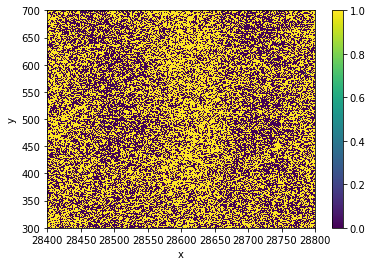

In [125]:
# compute complex coherence with formula from SAR2Cube
coh_complex = (img.sel(band="i", t=1) * img.sel(band="i", t=2)) + (img.sel(band="q", t=1) * img.sel(band="q", t=2)) / ((((img.sel(band="i", t=1) ** 2  + img.sel(band="q", t=1) ** 2)) * ((img.sel(band="i", t=2) ** 2  + img.sel(band="q", t=2) ** 2))) ** 0.5)
coh_complex.clip(min=0, max=1).plot()

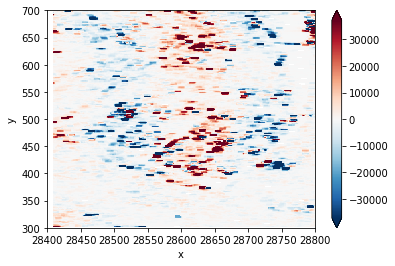

In [156]:
# then mean over moving window (e.g. 10x3), xarray 0.16 is installed and multiple windows are supported since .17
coh = coh_complex.rolling(x=10).mean().rolling(y=3).mean() # mean cant really be split into x, y operations I think but it doesnt work otherwise
#coh.coords["x"] = range(0, 400)
#coh.coords["y"] = range(0, 400)
coh.plot(robust=True)